# PyTorch ToyProblem: MNIST with LeNet - 2018.06.28


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

%matplotlib inline

In [2]:
# Getting train & test dataset

transform = transforms.Compose([
    transforms.CenterCrop(32),
    transforms.ToTensor()
])

train_mnist = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_mnist = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
dataloader_train = torch.utils.data.DataLoader(train_mnist, batch_size=16, shuffle=True, num_workers=2)
dataloader_test = torch.utils.data.DataLoader(test_mnist, batch_size=16, shuffle=False, num_workers=2)

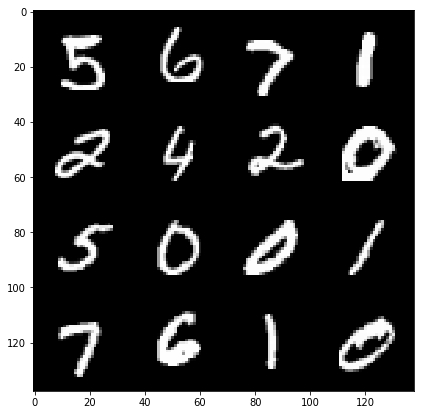

In [3]:
# Showing image

def imshow(img, w=4, h=4):
    img = np.transpose(img, (1, 2, 0))
    plt.subplots(figsize=(w, h))
    plt.imshow(img)

sample_for_display = iter(dataloader_train)
imshow( torchvision.utils.make_grid(sample_for_display.next()[0], 4), w=7, h=7)

In [4]:
# Device setup

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [5]:
# Defining Lenet

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [6]:
# Defining Loss function & Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
# Training

for epoch in tqdm(range(5)):
    print('Epoch %d' % epoch)
    for i, data in enumerate(dataloader_train):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 1000 == 0:
            print('%d data processed. loss = %f' % (i, loss))

print('Finished training.')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0
0 data processed. loss = 2.316425
1000 data processed. loss = 2.243378
2000 data processed. loss = 0.771471
3000 data processed. loss = 0.261320


 20%|██        | 1/5 [00:05<00:23,  5.77s/it]

Epoch 1
0 data processed. loss = 0.701818
1000 data processed. loss = 0.023003
2000 data processed. loss = 0.575972
3000 data processed. loss = 0.055073


 40%|████      | 2/5 [00:11<00:17,  5.82s/it]

Epoch 2
0 data processed. loss = 0.058183
1000 data processed. loss = 0.003839
2000 data processed. loss = 0.018098
3000 data processed. loss = 0.017304


 60%|██████    | 3/5 [00:17<00:11,  5.83s/it]

Epoch 3
0 data processed. loss = 0.098970
1000 data processed. loss = 0.094420
2000 data processed. loss = 0.005679
3000 data processed. loss = 0.009757


 80%|████████  | 4/5 [00:23<00:05,  5.80s/it]

Epoch 4
0 data processed. loss = 0.499682
1000 data processed. loss = 0.005112
2000 data processed. loss = 0.016326
3000 data processed. loss = 0.008771


100%|██████████| 5/5 [00:29<00:00,  5.83s/it]

Finished training.


tensor([ 7,  2,  1,  0,  4,  1,  4,  9,  5,  9,  0,  6,  9,  0,
         1,  5], device='cuda:0')
tensor([ 7,  2,  1,  0,  4,  1,  4,  9,  5,  9,  0,  6,  9,  0,
         1,  5], device='cuda:0')


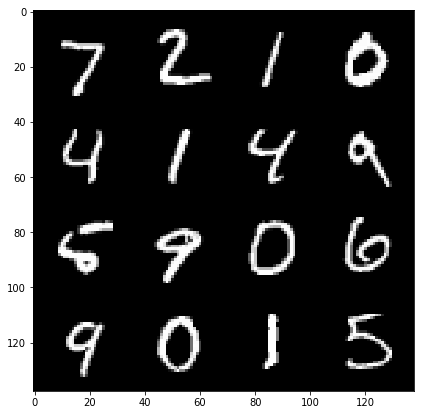

In [8]:
# Check data with some simple visualization

test_sample_for_display = iter(dataloader_test)
images, labels = test_sample_for_display.next()
images, labels = images.to(device), labels.to(device)
outputs = net(images)
_, predictions = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(images, 4), w=7, h=7)
print(labels)
print(predictions)

In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in dataloader_test:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, prediction = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (prediction == labels).sum().item()
        
print('Accuracy for the test images: %d %%' % (100 * correct / total))

Accuracy for the test images: 98 %
